In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/google-stock-prediction/GOOG.csv


In [2]:
import pandas as pd

df = pd.read_csv('/kaggle/input/google-stock-prediction/GOOG.csv')
df

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,GOOG,2016-02-16 00:00:00+00:00,691.00,698.0000,685.05,692.98,2520021,691.00,698.0000,685.05,692.98,2520021,0.0,1.0
1,GOOG,2016-02-17 00:00:00+00:00,708.40,709.7500,691.38,699.00,2492634,708.40,709.7500,691.38,699.00,2492634,0.0,1.0
2,GOOG,2016-02-18 00:00:00+00:00,697.35,712.3500,696.03,710.00,1883248,697.35,712.3500,696.03,710.00,1883248,0.0,1.0
3,GOOG,2016-02-19 00:00:00+00:00,700.91,703.0805,694.05,695.03,1589281,700.91,703.0805,694.05,695.03,1589281,0.0,1.0
4,GOOG,2016-02-22 00:00:00+00:00,706.46,713.2400,702.51,707.45,1949816,706.46,713.2400,702.51,707.45,1949816,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1252,GOOG,2021-02-04 00:00:00+00:00,2062.37,2078.5500,2042.59,2068.89,1852329,2062.37,2078.5500,2042.59,2068.89,1852329,0.0,1.0
1253,GOOG,2021-02-05 00:00:00+00:00,2098.00,2102.5100,2059.33,2070.00,1535135,2098.00,2102.5100,2059.33,2070.00,1535135,0.0,1.0
1254,GOOG,2021-02-08 00:00:00+00:00,2092.91,2123.5469,2072.00,2105.91,1242411,2092.91,2123.5469,2072.00,2105.91,1242411,0.0,1.0
1255,GOOG,2021-02-09 00:00:00+00:00,2083.51,2105.1300,2078.54,2078.54,886247,2083.51,2105.1300,2078.54,2078.54,886247,0.0,1.0


In [3]:
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
data = df.drop(['symbol','divCash','splitFactor', 'date'], axis=1)
# data.index = df.date
data

,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume
0,691.00,698.0000,685.05,692.98,2520021,691.00,698.0000,685.05,692.98,2520021
1,708.40,709.7500,691.38,699.00,2492634,708.40,709.7500,691.38,699.00,2492634
2,697.35,712.3500,696.03,710.00,1883248,697.35,712.3500,696.03,710.00,1883248
3,700.91,703.0805,694.05,695.03,1589281,700.91,703.0805,694.05,695.03,1589281
4,706.46,713.2400,702.51,707.45,1949816,706.46,713.2400,702.51,707.45,1949816
...,...,...,...,...,...,...,...,...,...,...
1252,2062.37,2078.5500,2042.59,2068.89,1852329,2062.37,2078.5500,2042.59,2068.89,1852329
1253,2098.00,2102.5100,2059.33,2070.00,1535135,2098.00,2102.5100,2059.33,2070.00,1535135
1254,2092.91,2123.5469,2072.00,2105.91,1242411,2092.91,2123.5469,2072.00,2105.91,1242411
1255,2083.51,2105.1300,2078.54,2078.54,886247,2083.51,2105.1300,2078.54,2078.54,886247


Stationary time series

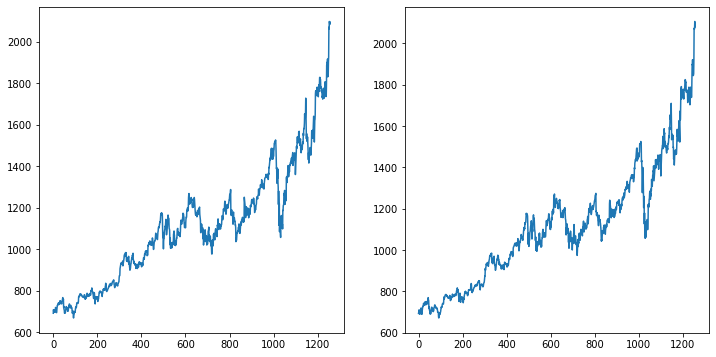

In [5]:
plt.figure(figsize=(12, 6))
plt.subplot(1,2,1)
plt.plot(data['close'])
plt.subplot(1,2,2)
plt.plot(data['open'])

In [6]:
train = data.iloc[:len(data)-len(data)//4]
test =  data.iloc[len(data)-len(data)//4:]
train

,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume
0,691.00,698.0000,685.05,692.98,2520021,691.00,698.0000,685.05,692.98,2520021
1,708.40,709.7500,691.38,699.00,2492634,708.40,709.7500,691.38,699.00,2492634
2,697.35,712.3500,696.03,710.00,1883248,697.35,712.3500,696.03,710.00,1883248
3,700.91,703.0805,694.05,695.03,1589281,700.91,703.0805,694.05,695.03,1589281
4,706.46,713.2400,702.51,707.45,1949816,706.46,713.2400,702.51,707.45,1949816
...,...,...,...,...,...,...,...,...,...,...
938,1292.03,1298.9300,1291.23,1292.89,1282711,1292.03,1298.9300,1291.23,1292.89,1282711
939,1291.80,1293.7300,1282.50,1289.46,1152977,1291.80,1293.7300,1282.50,1289.46,1152977
940,1308.86,1323.7400,1294.24,1294.28,2029970,1308.86,1323.7400,1294.24,1294.28,2029970
941,1311.37,1318.0000,1304.37,1305.28,1251916,1311.37,1318.0000,1304.37,1305.28,1251916


In [7]:
def var(data):
    model = VAR(data)
    model_fit = model.fit()
    prediction = model_fit.forecast(model_fit.y, steps=10) # predicting all the next 10 values at each step
    return np.array(prediction)

In [8]:
close_predictions = []
open_predictions = []
for timepoint in range(0, len(test)):
    Actual_train = data.iloc[timepoint:timepoint + len(train)]
    Prediction = var(Actual_train)
    close_predictions.append(Prediction[:,0])
    open_predictions.append(Prediction[:,3])

/opt/conda/lib/python3.7/site-packages/statsmodels/base/wrapper.py:34: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)


In [9]:
p_close= [close_predictions[i][0] for i in range(len(close_predictions))]
p_open= [open_predictions[i][0] for i in range(len(open_predictions))]

Text(0.5, 0, 'open')

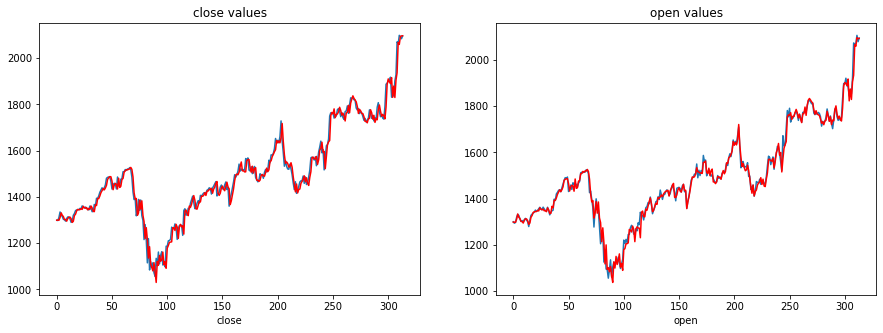

In [10]:
plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
plt.plot(np.array(test['close']))
plt.plot(p_close,'r')
plt.title('close values')
plt.xlabel('close')
plt.subplot(1,2,2)
plt.plot(np.array(test['open']))
plt.plot(p_open, 'r' )
plt.title('open values')
plt.xlabel('open')